## Visualising high-dimensional MNIST dataset using Principal Components Analysis (**PCA**) and T-Distributed Stochastic Neighbouring Entities (**t-SNE**)

#### In this practical work, we will use MNIST dataset through Scikit Learn. We would like to apply PCA and t-SNE seperatly and afterward compare them with t-SNE applying on PCA-reduced data 

###### Source: Towards Data Science

#### Importing Packages

In [0]:
from __future__ import print_function
import time
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

#### Loading **MNIST** Dataset

In [2]:
mnist = fetch_openml('mnist_784')
X = mnist.data / 255.0
y = mnist.target
print(X.shape, y.shape)

(70000, 784) (70000,)


#### Creating Pandas DataFrame

In [3]:
feat_cols = [ 'pixel'+str(i) for i in range(1, X.shape[1] + 1) ]
df = pd.DataFrame(X,columns=feat_cols)
df['y'] = y
df['label'] = df['y'].apply(lambda i: str(i))
X, y = None, None
print('Size of the dataframe is  {}'.format(df.shape))

Size of the dataframe is  (70000, 786)


In [0]:
# For reproducability of the results
np.random.seed(42)
rndperm = np.random.permutation(df.shape[0])

#### Visualising couple of digits randomly

<Figure size 432x288 with 0 Axes>

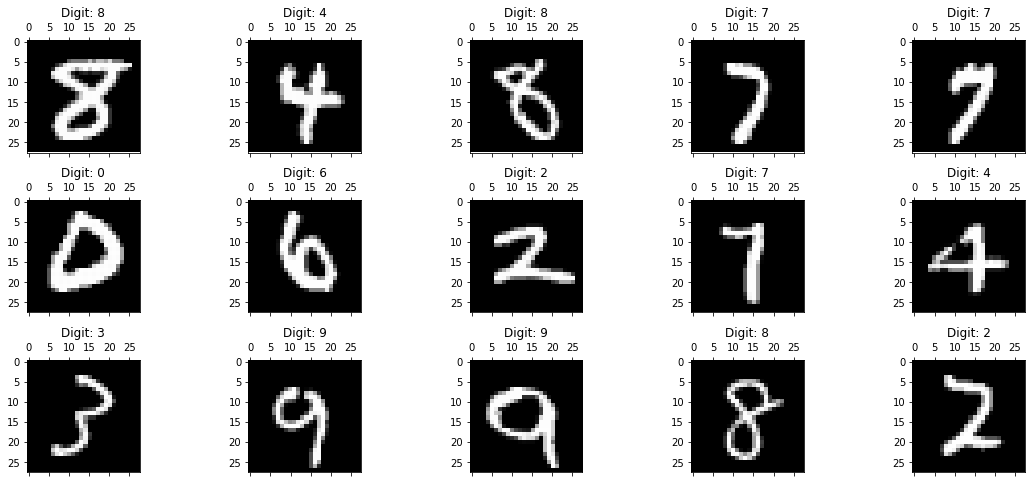

In [5]:
plt.gray()
fig = plt.figure( figsize=(16,7) )
for i in range(0,15):
    ax = fig.add_subplot(3,5,i+1, title="Digit: {}".format(str(df.loc[rndperm[i],'label'])) )
    plt.tight_layout()
    ax.matshow(df.loc[rndperm[i],feat_cols].values.reshape((28,28)).astype(float))
plt.show()

### Dimensionality reduction using **PCA**

In [6]:
# PCA on MNIST data

time_start = time.time()

pca = PCA(n_components=3)
pca_result = pca.fit_transform(df[feat_cols].values)
df['pca-one'] = pca_result[:,0]
df['pca-two'] = pca_result[:,1] 
df['pca-three'] = pca_result[:,2]
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

print('PCA done! Time elapsed: {} seconds'.format(time.time()-time_start))

Explained variation per principal component: [0.09746116 0.07155445 0.06149531]
PCA done! Time elapsed: 4.5278708934783936 seconds


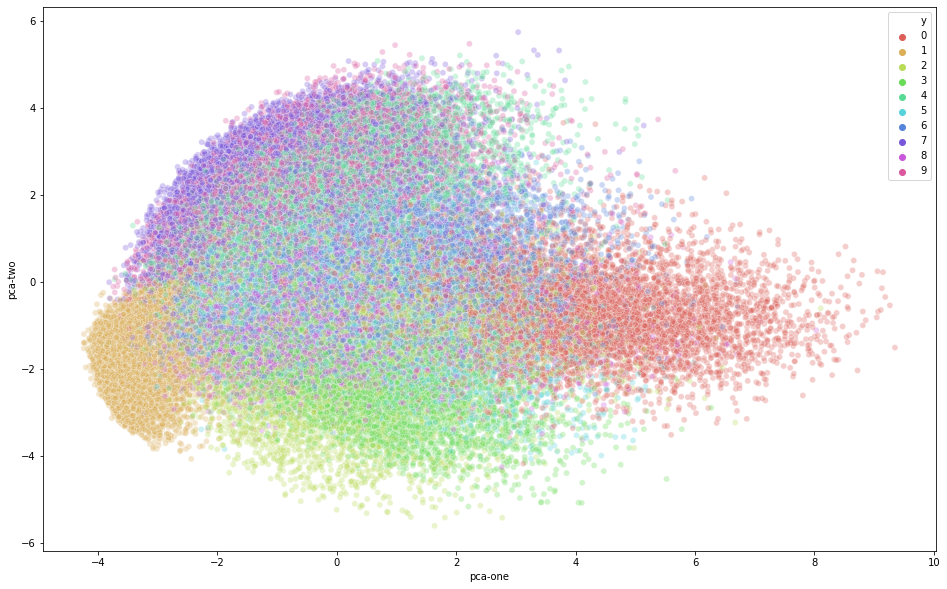

In [7]:
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="pca-one", y="pca-two",
    hue="y",
    palette=sns.color_palette("hls", 10),
    data=df.loc[rndperm,:],
    legend="full",
    alpha=0.3)

#### For a 3D-version of the above plot

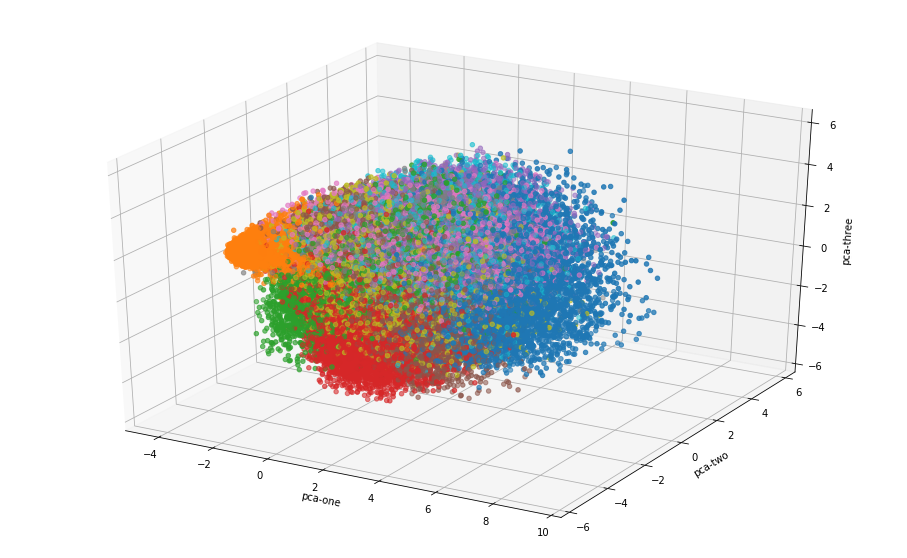

In [8]:
ax = plt.figure(figsize=(16,10)).gca(projection='3d')
ax.scatter(
    xs=df.loc[rndperm,:]["pca-one"], 
    ys=df.loc[rndperm,:]["pca-two"], 
    zs=df.loc[rndperm,:]["pca-three"], 
    c=(df.loc[rndperm,:]["y"].astype(float)), 
    cmap='tab10')
ax.set_xlabel('pca-one')
ax.set_ylabel('pca-two')
ax.set_zlabel('pca-three')
plt.show()

###T-Distributed Stochastic Neighbouring Entities (t-SNE)
#### t-SNE is another technique for dimensionality reduction and is particularly well suited for the visualization of high-dimensional datasets. Contrary to PCA it is not a mathematical technique but a probablistic one.
- It is highly recommended: in case of very high dimensional data, you may need to apply another dimensionality reduction technique **before** using t-SNEhigh.


#### **First**, we will only use the first **15000** samples to run the algorithm.

In [9]:
# Applying PCA on subset of data (15000 samples)

N = 15000 # you can choose your own subset.
time_start = time.time()
df_subset = df.loc[rndperm[:N],:].copy()
data_subset = df_subset[feat_cols].values
pca = PCA(n_components=3)
pca_result = pca.fit_transform(data_subset)
df_subset['pca-one'] = pca_result[:,0]
df_subset['pca-two'] = pca_result[:,1] 
df_subset['pca-three'] = pca_result[:,2]
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))
print('PCA on subset of data done! Time elapsed: {} seconds'.format(time.time()-time_start))

Explained variation per principal component: [0.09728802 0.07136662 0.06090496]
PCA on subset of data done! Time elapsed: 1.368760585784912 seconds


#### Visualization of **PCA** on subset of data (**15000** samples)


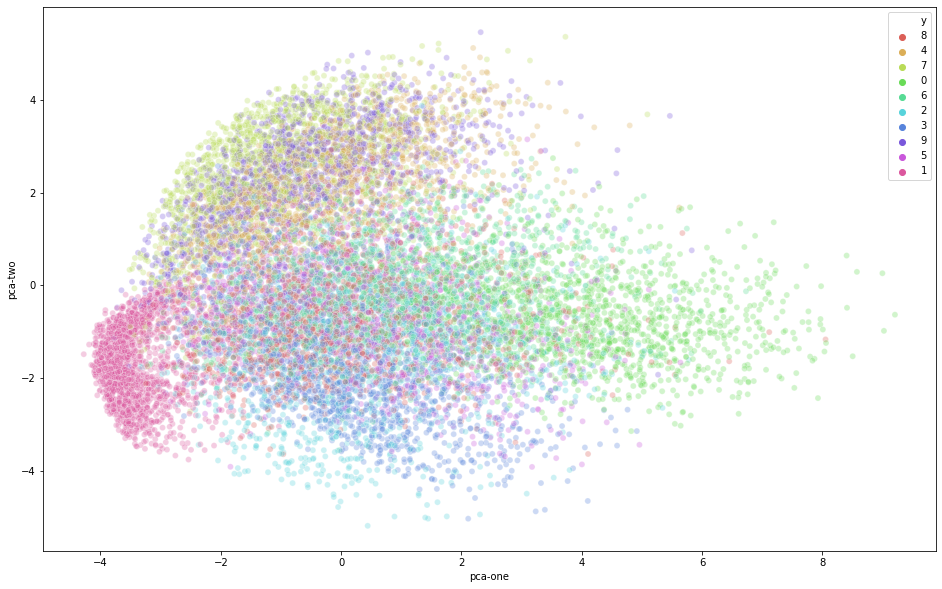

In [10]:
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="pca-one", y="pca-two",
    hue="y",
    palette=sns.color_palette("hls", 10),
    data=df_subset.reindex(rndperm),
    legend="full",
    alpha=0.3
)

In [11]:
# Applying t-SNE
time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(data_subset)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 15000 samples in 0.895s...
[t-SNE] Computed neighbors for 15000 samples in 367.190s...
[t-SNE] Computed conditional probabilities for sample 1000 / 15000
[t-SNE] Computed conditional probabilities for sample 2000 / 15000
[t-SNE] Computed conditional probabilities for sample 3000 / 15000
[t-SNE] Computed conditional probabilities for sample 4000 / 15000
[t-SNE] Computed conditional probabilities for sample 5000 / 15000
[t-SNE] Computed conditional probabilities for sample 6000 / 15000
[t-SNE] Computed conditional probabilities for sample 7000 / 15000
[t-SNE] Computed conditional probabilities for sample 8000 / 15000
[t-SNE] Computed conditional probabilities for sample 9000 / 15000
[t-SNE] Computed conditional probabilities for sample 10000 / 15000
[t-SNE] Computed conditional probabilities for sample 11000 / 15000
[t-SNE] Computed conditional probabilities for sample 12000 / 15000
[t-SNE] Computed conditional probabilities for 

#### **T-SNE** Visualization

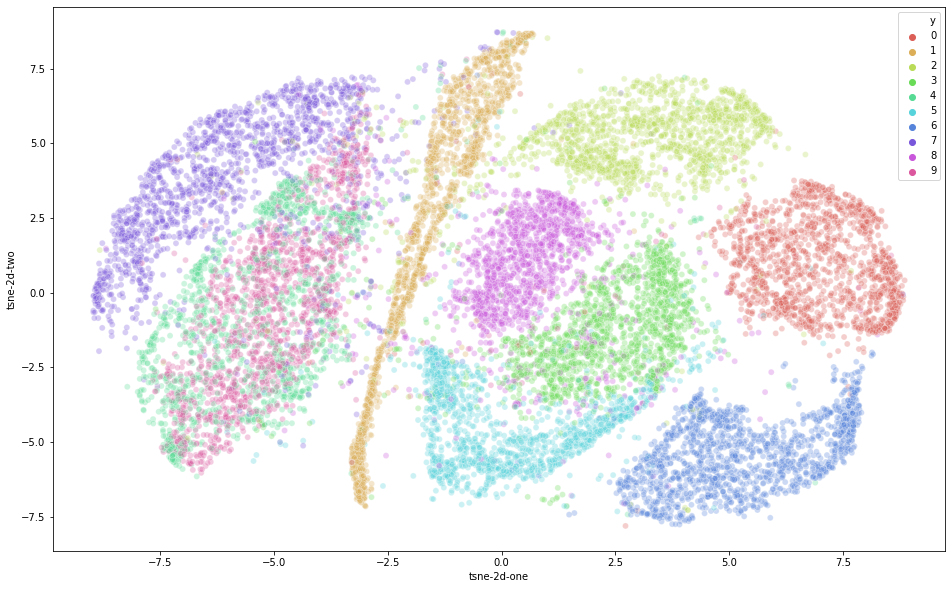

In [12]:
df_subset['tsne-2d-one'] = tsne_results[:,0]
df_subset['tsne-2d-two'] = tsne_results[:,1]
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="y",
    palette=sns.color_palette("hls", 10),
    data=df_subset,
    legend="full",
    alpha=0.3
)

#### Improvement over the PCA visualisation we used earlier. We can see that the digits are very clearly clustered in their own sub groups.

### Visually comparison between **PCA** and **t-SNE**

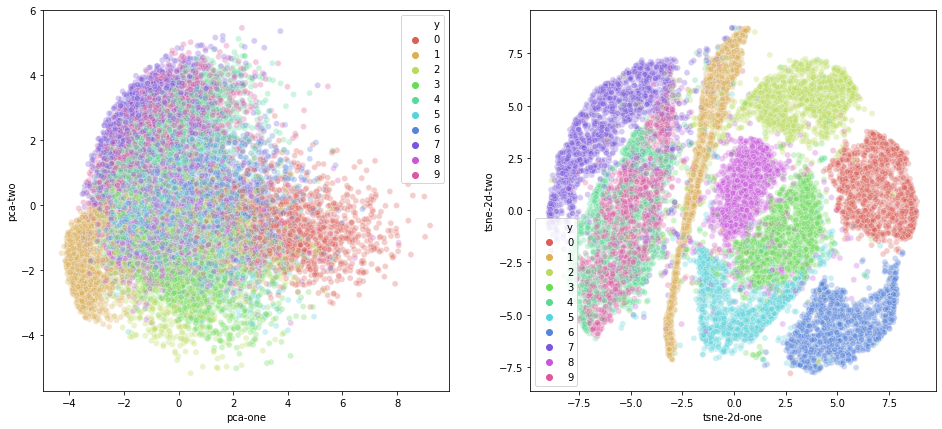

In [13]:
plt.figure(figsize=(16,7))
plt.tight_layout()
ax1 = plt.subplot(1, 2, 1)
sns.scatterplot(
    x="pca-one", y="pca-two",
    hue="y",
    palette=sns.color_palette("hls", 10),
    data=df_subset,
    legend="full",
    alpha=0.3,
    ax=ax1
)
ax2 = plt.subplot(1, 2, 2)
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="y",
    palette=sns.color_palette("hls", 10),
    data=df_subset,
    legend="full",
    alpha=0.3,
    ax=ax2
)

## Reduce the number of dimensions before feeding the data into the t-SNE algorithm
#### Therefore, we will use PCA again. We will first create a new dataset containing the fifty dimensions generated by the PCA reduction algorithm. We can then use this dataset to perform the t-SNE on it.

In [14]:
time_start = time.time()
pca_50 = PCA(n_components=50)
pca_result_50 = pca_50.fit_transform(df_subset)
print('Cumulative explained variation for 50 principal components: {}'.format(np.sum(pca_50.explained_variance_ratio_)))
print('PCA before t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

Cumulative explained variation for 50 principal components: 0.9176469043830459
PCA before t-SNE done! Time elapsed: 3.271864652633667 seconds


### t-SNE on PCA-reduced data

In [15]:
# t-SNE on PCA-reduced data
time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_pca_results = tsne.fit_transform(pca_result_50)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 15000 samples in 0.035s...
[t-SNE] Computed neighbors for 15000 samples in 8.959s...
[t-SNE] Computed conditional probabilities for sample 1000 / 15000
[t-SNE] Computed conditional probabilities for sample 2000 / 15000
[t-SNE] Computed conditional probabilities for sample 3000 / 15000
[t-SNE] Computed conditional probabilities for sample 4000 / 15000
[t-SNE] Computed conditional probabilities for sample 5000 / 15000
[t-SNE] Computed conditional probabilities for sample 6000 / 15000
[t-SNE] Computed conditional probabilities for sample 7000 / 15000
[t-SNE] Computed conditional probabilities for sample 8000 / 15000
[t-SNE] Computed conditional probabilities for sample 9000 / 15000
[t-SNE] Computed conditional probabilities for sample 10000 / 15000
[t-SNE] Computed conditional probabilities for sample 11000 / 15000
[t-SNE] Computed conditional probabilities for sample 12000 / 15000
[t-SNE] Computed conditional probabilities for sa

### Visualization

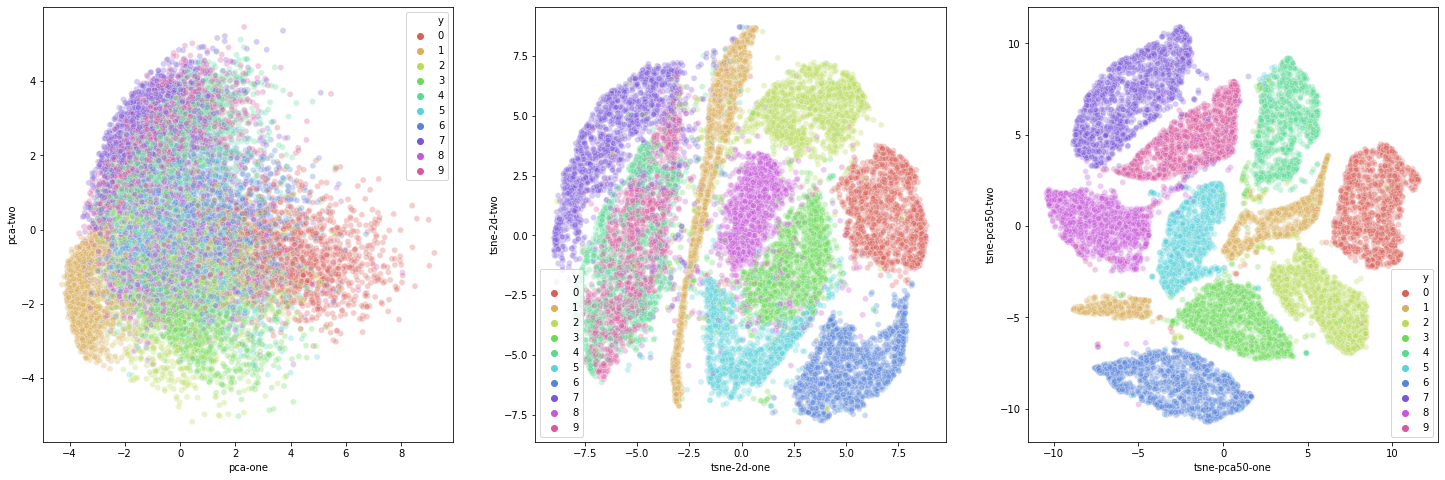

In [16]:
df_subset['tsne-pca50-one'] = tsne_pca_results[:,0]
df_subset['tsne-pca50-two'] = tsne_pca_results[:,1]
plt.figure(figsize=(25,8))
plt.tight_layout()
ax1 = plt.subplot(1, 3, 1)
sns.scatterplot(
    x="pca-one", y="pca-two",
    hue="y",
    palette=sns.color_palette("hls", 10),
    data=df_subset,
    legend="full",
    alpha=0.3,
    ax=ax1
)
ax2 = plt.subplot(1, 3, 2)
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="y",
    palette=sns.color_palette("hls", 10),
    data=df_subset,
    legend="full",
    alpha=0.3,
    ax=ax2
)
ax3 = plt.subplot(1, 3, 3)
sns.scatterplot(
    x="tsne-pca50-one", y="tsne-pca50-two",
    hue="y",
    palette=sns.color_palette("hls", 10),
    data=df_subset,
    legend="full",
    alpha=0.3,
    ax=ax3
)